<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='10'><b> Machine Learning - Classification Model Evaluation</b></font> </p><font color='#559E54' size=6>Instructor Copy</font> </p>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'>

---

### Load The Dataset

This data is taken from a telecommunications company and involves customer data for a collection of customers who either stayed with the company or left within a certain period. In many industries its often not the case that the cut off is so binary. Frequently it might be more likely that a client account lays dormant rather then getting explicitly closed - for example if the client only pays for usage.

This dataset is taken from [here](http://www.dataminingconsultant.com/data/churn.txt) with descriptions of the data available [here](http://www.sgi.com/tech/mlc/db/churn.names).


- Each row represents a subscribing telephone customer. 
- Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
%matplotlib inline 

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# $\Delta$ 1. Model Fitting

## 1.1 - Load data

In [2]:
churn_df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/churn.csv')
col_names = churn_df.columns.tolist()
print ("Column names:")
print (col_names)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn']


In [3]:
churn_df.shape

(3333, 21)

In [4]:
churn_df.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### $\sigma$ Adjust display options for pandas
> If pandas not displaying all columns, you need to change the options for max_columns

In [5]:
print(pd.get_option("display.max_columns"))

20


In [6]:
import pandas as pd
pd.set_option('display.max_columns', 0)

In [7]:
churn_df.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


> After the max_columns option is set to 0, all columns get displayed properly

## 1.2 - Define the target variable
> Convert boolean/catgorical variable to numerical binary values

In [8]:
churn_df['Churn'] = churn_df.Churn.map({True: 1, False: 0})

In [9]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## 1.3 - Remove some columns for this analysis
> We will focus on model evaluation instead of feature engineering

In [10]:
# Drop some variables 
# Target variable removed from feature columns
to_drop = ['State','Area Code','Phone', 'Churn']
churn_X = churn_df.drop(to_drop,axis=1)

In [11]:
# 'yes'/'no' has to be converted to boolean values
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_X[yes_no_cols] = churn_X[yes_no_cols] == 'yes'

In [12]:
churn_X.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [13]:
churn_y = churn_df['Churn']
churn_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

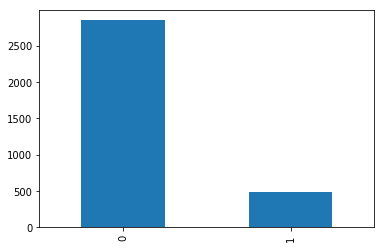

In [14]:
churn_df['Churn'].value_counts().plot.bar()

## 1.4 - Train/Test Split

### $\sigma$ Split dataset into training and testing
- 70% training, 30% testing
- shuffle=True
- random_state=2018

In [15]:
################################
## Your Code Below
################################

train_X, test_X, train_y, test_y = train_test_split(churn_X, churn_y, test_size=0.3, shuffle=True, random_state=2018)

In [16]:
print("Training data feature dimensions: {}".format(train_X.shape))
print("Training data target dimensions: {}".format(train_y.shape))

print("Testing data feature dimensions: {}".format(test_X.shape))
print("Testing data targetdimensions: {}".format(test_y.shape))

Training data feature dimensions: (2333, 17)
Training data target dimensions: (2333,)
Testing data feature dimensions: (1000, 17)
Testing data targetdimensions: (1000,)


## 1.5 - Standardize Features

In [17]:
# Pull out features for future use
features = train_X.columns
print (features)

Index(['Account Length', 'Int'l Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls'],
      dtype='object')


### $\sigma$ Fit and transform on training set

In [18]:
# Standarsize features
scaler = StandardScaler()
train_X_std = scaler.fit_transform(train_X)
print ("Number of features: ", train_X_std.shape)
print ("Unique target labels:", np.unique(train_y))

Number of features:  (2333, 17)
Unique target labels: [0 1]


### $\sigma$ Transform the test set as well

In [19]:
test_X_std = scaler.transform(test_X)

In [20]:
print ("Number of features: ", test_X_std.shape)
print ("Unique target labels:", np.unique(test_y))

Number of features:  (1000, 17)
Unique target labels: [0 1]


## 1.6 - Model Training

### $\sigma$ Fit a logistic regression model

In [39]:
################################
## Your Code Below
################################

from sklearn.linear_model import LogisticRegression 

# model instantiation
lr = LogisticRegression()

# model training
lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### $\sigma$ Make predictions

In [40]:
################################
## Your Code Below
################################

train_y_pred = lr.predict(train_X)
test_y_pred = lr.predict(test_X)

In [45]:
train_y_pred[:100]

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
test_y_pred[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
train_y_pred[:100] == test_y_pred[:100]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True])

---

# $\Delta$ 2. Model Evaluation

### $\omega$ Classification Evaluation Metrics

`
**metrics.accuracy_score**                  Accuracy classification score.  
**metrics.auc**                             Compute Area Under the Curve (AUC) using the trapezoidal rule  
**metrics.average_precision_score**         Compute average precision (AP) from prediction scores  
**metrics.classification_report**           Build a text report showing the main classification metrics  
**metrics.confusion_matrix**                Compute confusion matrix to evaluate the accuracy of a classification  
**metrics.f1_score**                        Compute the F1 score, also known as balanced F-score or F-measure  
**metrics.precision_recall_curve**          Compute precision-recall pairs for different probability thresholds  
**metrics.precision_recall_fscore_support** Compute precision, recall, F-measure and support for each class  
**metrics.precision_score**                 Compute the precision  
**metrics.recall_score**                    Compute the recall  
**metrics.roc_auc_score**                   Compute (ROC AUC) from prediction scores.  
**metrics.roc_curve**                       Compute Receiver operating characteristic (ROC)  
`

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve

In [48]:
print(classification_report(train_y, train_y_pred))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93      2003
          1       0.60      0.18      0.28       330

avg / total       0.84      0.87      0.83      2333



In [49]:
print(classification_report(test_y, test_y_pred))

             precision    recall  f1-score   support

          0       0.87      0.98      0.92       847
          1       0.57      0.16      0.25       153

avg / total       0.82      0.85      0.82      1000



## $\Sigma$ 2.1 - Confusion Matrix

In [50]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### $\sigma$ Plot confusion matrix

Confusion matrix, without normalization
[[829  18]
 [129  24]]


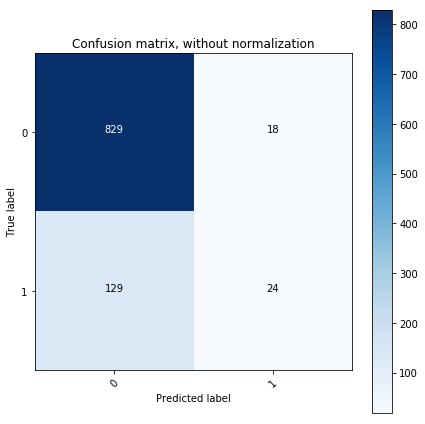

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, test_y_pred)
np.set_printoptions(precision=2)

class_names = list(range(2))
# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, 
                      classes=class_names, 
                      title='Confusion matrix, without normalization')

plt.show()

## $\Sigma$ 2.2 - Prediction Accuracy

### $\sigma$  2.2.1 - Calculate Accuracy manually

In [30]:
train_y.values

array([0, 0, 0, ..., 0, 1, 0])

In [31]:
train_acc = np.mean(train_y.values == train_y_pred)
test_acc = np.mean(test_y.values == test_y_pred)
print ('training accuracy: {}'.format(train_acc))
print ('testing accuracy: {}'.format(test_acc))

training accuracy: 0.866695242177454
testing accuracy: 0.853


### $\sigma$ 2.2.2 -Calculate Accuracy using `sklearn.metrics.accuracy_score`

`metrics.accuracy_score(y_true, y_pred)`

In [32]:
train_acc = accuracy_score(train_y.values, train_y_pred)
test_acc = accuracy_score(test_y.values, test_y_pred)
print ('training accuracy: {}'.format(train_acc))
print ('testing accuracy: {}'.format(test_acc))

training accuracy: 0.866695242177454
testing accuracy: 0.853


## $\Sigma$ 2.3 - Precision & Recall


**Precision**
> - The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of true positives and ``fp`` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
> - The best value is 1 and the worst value is 0.

**Recall**
> - The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of true positives and ``fn`` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
> - The best value is 1 and the worst value is 0.

### $\sigma$ 2.3.1 - Calculate Precision/Recall manually

#### Precision/Recall on training

In [33]:
true_positive = (train_y.values==1) & (train_y_pred==1)
pred_positive = train_y_pred == 1
total_positive = train_y == 1

# calculate precision
precision =  np.sum(true_positive) / np.sum(pred_positive)
print ('train precision: {0:.2f}'.format(precision))

# calculate recall
recall = np.sum(true_positive) / np.sum(total_positive)
print ('train recall: {0:.2f}'.format(recall))

train precision: 0.60
train recall: 0.18


#### Precision/Recall on testing

In [34]:
true_positive = (test_y.values==1) & (test_y_pred==1)
pred_positive = test_y_pred == 1
total_positive = test_y == 1

# calculate precision
precision =  np.sum(true_positive) / np.sum(pred_positive)
print ('test precision: {0:.2f}'.format(precision))

# calculate recall
recall = np.sum(true_positive) / np.sum(total_positive)
print ('test recall: {0:.2f}'.format(recall))

test precision: 0.57
test recall: 0.16


### $\sigma$ 2.3.2 - Calculate Precision/Recall using `sklearn.metrics`

#### Calculate Precision Score by using `sklearn.metrics`


In [35]:
############################
## Your Code Below
############################
train_precision = precision_score(train_y.values, train_y_pred)
test_precision = precision_score(test_y.values, test_y_pred)
print ('training recall: {0:.2f}'.format(train_precision))
print ('testing recall: {0:.2f}'.format(test_precision))

training recall: 0.60
testing recall: 0.57


#### Calculate Recall Score by using `sklearn.metrics`


In [36]:
############################
## Your Code Below
############################
train_recall = recall_score(train_y.values, train_y_pred)
test_recall = recall_score(test_y.values, test_y_pred)
print ('training recall: {0:.2f}'.format(train_recall))
print ('testing recall: {0:.2f}'.format(test_recall))

training recall: 0.18
testing recall: 0.16


## $\Sigma$  2.4 - f1_score

> The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

> The relative contribution of precision and recall to the F1 score are equal.

### Calculate F1_score manually

In [37]:
# F1-Score
train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print ('training recall: {0:.2f}'.format(train_f1))
print ('testing recall: {0:.2f}'.format(test_f1))

training recall: 0.28
testing recall: 0.25


### Calculate F1_score using sklearn.metrics

In [38]:
# F1-Score
train_f1 = f1_score(train_y.values, train_y_pred, pos_label=1)
test_f1 = f1_score(test_y.values, test_y_pred, pos_label=1)
print ('training recall: {0:.2f}'.format(train_f1))
print ('testing recall: {0:.2f}'.format(test_f1))

training recall: 0.28
testing recall: 0.25


---

# $\Delta$ 3. Model Evaluation Plots


## $\Omega$ 3.1 - ROC Curve

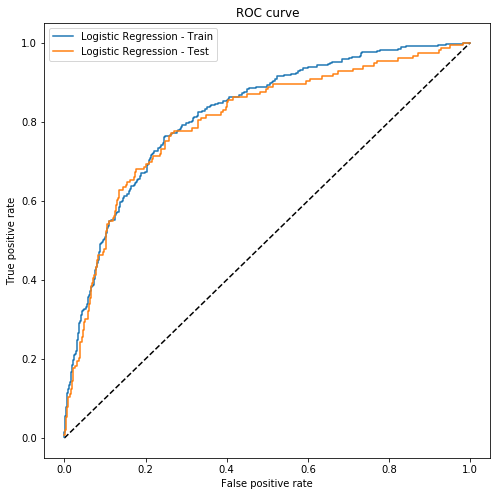

In [52]:
import numpy as np
np.random.seed(10)

from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression 

# model instantiation
lr = LogisticRegression()

# model training
lr.fit(train_X, train_y)

# make predictions
train_y_pred = lr.predict(train_X)
train_y_pred_proba = lr.predict_proba(train_X)[:, 1]

test_y_pred = lr.predict(test_X)
test_y_pred_proba = lr.predict_proba(test_X)[:, 1]

# roc curve
fpr_lr_train, tpr_lr_train, _ = roc_curve(train_y, train_y_pred_proba)
fpr_lr_test, tpr_lr_test, _ = roc_curve(test_y, test_y_pred_proba)

plt.figure(1, figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr_train, tpr_lr_train, label='Logistic Regression - Train')
plt.plot(fpr_lr_test, tpr_lr_test, label='Logistic Regression - Test')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

## $\Omega$ ROC Curve - Multiple Models

**Exercise**
1. Fit a Logisitic Regression model, calculate roc/auc score
2. Fit a Random Forest model, calculate roc/auc score
3. Fit a KNN model, calculate roc/auc score
4. Plot ROC curves in the same figure using matplotlib

In [41]:
####################################
## You Code Below
####################################







/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


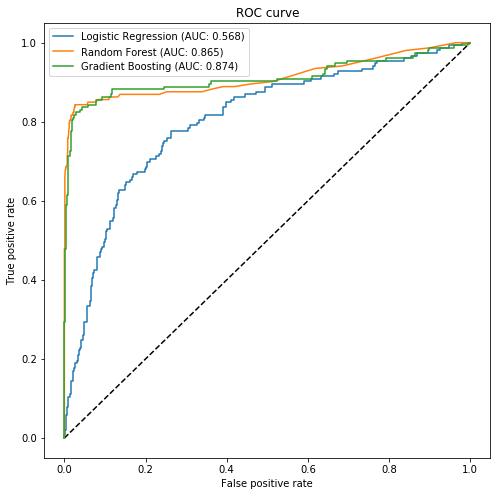

In [42]:
import numpy as np
np.random.seed(10)

from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Logistic Regression
lr = LogisticRegression()
lr.fit(train_X, train_y)
lr_y_pred = lr.predict(test_X)
lr_y_pred_proba = lr.predict_proba(test_X)[:, 1]
fpr_lr_test, tpr_lr_test, _ = roc_curve(test_y, lr_y_pred_proba)
lr_auc = roc_auc_score(test_y, lr_y_pred)

# Random Forest
rf = RandomForestClassifier(n_estimators=200)
rf.fit(train_X, train_y)
rf_y_pred = rf.predict(test_X)
rf_y_pred_proba = rf.predict_proba(test_X)[:, 1]
fpr_rf_test, tpr_rf_test, _ = roc_curve(test_y, rf_y_pred_proba)
rf_auc = roc_auc_score(test_y, rf_y_pred)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=1200)
gb.fit(train_X, train_y)
gb_y_pred = gb.predict(test_X)
gb_y_pred_proba = gb.predict_proba(test_X)[:, 1]
fpr_gb_test, tpr_gb_test, _ = roc_curve(test_y, gb_y_pred_proba)
gb_auc = roc_auc_score(test_y, gb_y_pred)


# Plot ROC curve
plt.figure(1, figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr_test, tpr_lr_test, label='Logistic Regression (AUC: {0:.3f})'.format(lr_auc))
plt.plot(fpr_rf_test, tpr_rf_test, label='Random Forest (AUC: {0:.3f})'.format(rf_auc))
plt.plot(fpr_gb_test, tpr_gb_test, label='Gradient Boosting (AUC: {0:.3f})'.format(gb_auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

In [43]:
print(classification_report(test_y, lr_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       847
           1       0.59      0.16      0.25       153

   micro avg       0.85      0.85      0.85      1000
   macro avg       0.73      0.57      0.58      1000
weighted avg       0.82      0.85      0.82      1000



In [44]:
print(classification_report(test_y, rf_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       847
           1       0.94      0.74      0.83       153

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.95      0.87      0.90      1000
weighted avg       0.95      0.95      0.95      1000



In [45]:
print(classification_report(test_y, gb_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       847
           1       0.89      0.76      0.82       153

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.93      0.87      0.90      1000
weighted avg       0.95      0.95      0.95      1000



# $\Delta$ 4. Cross-Validation ROC Curves (Optional)

## $\Omega$ 4.1 - Generate Stratified KFolds

In [46]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)

In [47]:
k_folds = list(cv.split(train_X, train_y))

In [48]:
k_folds[0]

(array([   1,    2,    4, ..., 2328, 2329, 2331]),
 array([   0,    3,    5,    8,   24,   26,   33,   35,   41,   43,   50,
          51,   52,   54,   55,   59,   74,   79,   85,   86,  108,  117,
         123,  130,  134,  137,  138,  140,  146,  167,  168,  181,  182,
         185,  188,  193,  206,  216,  220,  226,  228,  231,  232,  236,
         253,  255,  256,  258,  260,  270,  281,  293,  296,  308,  311,
         321,  326,  327,  330,  331,  333,  338,  347,  348,  351,  357,
         359,  366,  374,  375,  382,  390,  392,  393,  395,  407,  412,
         423,  426,  427,  428,  434,  435,  441,  451,  453,  454,  455,
         456,  457,  468,  473,  485,  501,  516,  521,  525,  527,  540,
         545,  550,  564,  566,  568,  571,  573,  574,  583,  590,  599,
         603,  608,  609,  612,  613,  620,  621,  626,  628,  630,  631,
         635,  637,  639,  644,  648,  652,  659,  663,  664,  665,  681,
         682,  684,  687,  693,  695,  706,  709,  714,  723,

In [49]:
print("Train set Size for Fold #1: {}".format(k_folds[0][0].shape))
print("Test set Size for Fold #1: {}".format(k_folds[0][1].shape))

Train set Size for Fold #1: (1866,)
Test set Size for Fold #1: (467,)


## $\Omega$ 4.2 - Model Training with Cross-Valiation

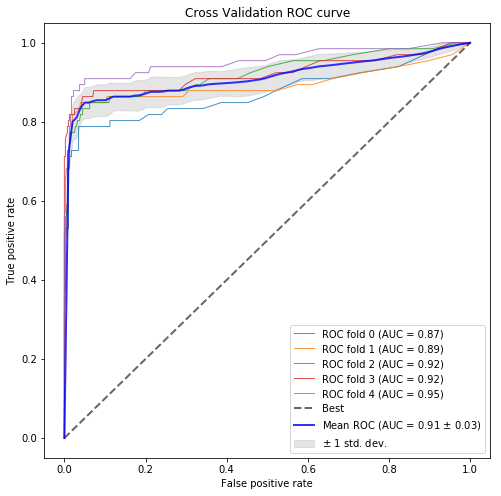

In [50]:
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline


# Classifier
clf = RandomForestClassifier(n_estimators=200, random_state=2018)

# Model fitting with 5-Fold CV
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

X = train_X
y = train_y

# Plot figure
plt.figure(1, figsize=(8,8))

i = 0
for cv_train, cv_test in cv.split(X, y):
    #cv_train_idx = cv_data_idx[0]
    #cv_test_idx = cv_data_idx[1]
    probas_ = clf.fit(X.iloc[cv_train], y.iloc[cv_train]).predict_proba(X.iloc[cv_test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[cv_test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # Plot ROC for each fold
    plt.plot(fpr, tpr, lw=1, alpha=0.8,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i+= 1



# Plot Random Guess Line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Best', alpha=.6)


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Cross Validation ROC curve')
plt.legend(loc='best')

plt.show()


# $\Delta$ 5. Lift & Cumulative Lift (Gains Chart)

## $\Omega$ 5.1 Calculate and Plot Gains (Lift)

In [51]:
def calc_lift(x, y, clf, bins):
    '''
    Generate model prediction and calculate deciles
    '''
    # Actual target value
    y_actual = y    
    # Predicted Probability
    y_prob = clf.predict_proba(x)
    # Predicted value of y
    y_pred = clf.predict(x)
    
    # Generate model results dataframe
    cols = ['actual','pred_proba','pred']
    data = [y_actual, y_prob[:,1] ,y_pred]
    df = pd.DataFrame(dict(zip(cols,data)))
    
    # Observations where y=1
    total_positive_n = df['actual'].sum()
    
    # Total Observations
    total_obs = df.shape[0]
    
    # Baseline positive rate
    baseline_positive_r = total_positive_n / float(total_obs)
    
    # Create N deciles (Decile 1: highest prob --> Decile 10: lowest prob)
    df['deciles'] = pd.qcut(df['pred_proba'], bins, labels=False)
    
    # Reverse the decile number so that high probability has lower index number
    df['deciles'] = bins - df['deciles']
    
    '''
    Calculate lift by decile
    '''
    # Calculate decile level positive rate
    lift_df = df.groupby('deciles').agg({'actual': [np.mean, np.sum, len]})
    lift_df['cumsum'] = lift_df['actual']['sum'].cumsum() 
    lift_df['cumsum_rate'] = lift_df['cumsum'] / lift_df['actual']['sum'].sum()
    lift_df['lift'] = lift_df['actual']['mean'] / (lift_df['actual']['sum'].sum() / lift_df['actual']['len'].sum())
    lift_df['baseline_positive_rate'] = lift_df['actual']['sum'].sum() / lift_df['actual']['len'].sum()
    return lift_df

In [52]:
df_lift = calc_lift(test_X, test_y, gb, bins=20)

In [53]:
def plot_lift_chart(lift: pd.DataFrame, bins):
    
    #plt.style.use('classic')
    plt.figure(figsize=(8,8))
    plt.plot(lift['baseline_positive_rate'], 
             linestyle='dashed',
             lw=2, 
             alpha=0.7, 
             label='Baseline Positive Rate')
    plt.plot(lift['actual']['mean'], 
             linestyle='solid',
             lw=2, 
             marker='o',
             alpha=0.7, 
             label='Decile Positive Rate')
    plt.plot(lift['cumsum_rate'], 
             linestyle='solid', 
             lw=2, 
             marker='o',
             alpha=0.7, 
             label='Cumulative Positive Rate')
    # legend
    plt.legend(loc='best')
    # tick marks
    x_tick_marks = np.arange(bins) + 1
    y_tick_marks = np.arange(0, 1.1, 0.1)
    plt.tick_params(axis='x', 
                    which='both',      # both major and minor ticks are affected
                    top='off',         # ticks along the top edge are off
                    labelbottom='on',
                    labelsize=11)      # labels along the bottom edge are off
    plt.tick_params(axis='y', 
                    which='both',  
                    left='on',         
                    right='off',
                    labelbottom='on',
                    labelsize=11)      # labels along the bottom edge are off
    plt.xticks(x_tick_marks)
    plt.yticks(y_tick_marks)
    # labels
    plt.xlabel('Deciles', size=12)
    plt.ylabel('Positive Rate', size=12)
    # title
    plt.title('Lift Curves')
    plt.show()

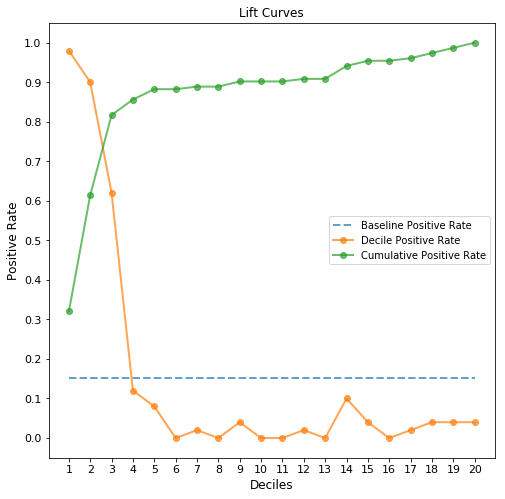

In [54]:
plot_lift_chart(df_lift, 20)